# K Nearest Neighbors - Predic T-shirt Size

## Problem Statement

You own an online clothing business and you would like to develop a new app feature in which customers would enter their height and weight and the system would predict what T-shirt size they wear. Features are height and weight and output is either L (Large) or S (Small).

## Step #0: Import Libraries

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Step #1: Load Data

In [24]:
Tshirt = pd.read_csv('Data\Tshirt_sizing_Dataset.csv')

In [25]:
Tshirt.head()

,Height (in cms),Weight (in kgs),T Shirt Size
0,158,58,S
1,158,59,S
2,158,63,S
3,160,59,S
4,160,60,S


In [26]:
cols = ['height', 'weight', 'size']
Tshirt.columns = cols
Tshirt.head()

,height,weight,size
0,158,58,S
1,158,59,S
2,158,63,S
3,160,59,S
4,160,60,S


## Step #2: Create Training and Testing Dataset

In [27]:
X = Tshirt.iloc[:,0:2].values
y = Tshirt.iloc[:, 2].values
X.shape, y.shape

((18, 2), (18,))

In [28]:
from sklearn.preprocessing import LabelEncoder
le_y = LabelEncoder()
y = le_y.fit_transform(y)

In [29]:
y

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

In [36]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13, 2), (5, 2), (13,), (5,))

## Step #3: Model Training

In [82]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) ## minkowski with p=2 is same as Euclidean
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

## Step #4: Model Testing

In [83]:
y_pred = clf.predict(X_test)

In [84]:
y_pred

array([1, 1, 0, 1, 0])

In [85]:
y_test

array([1, 1, 0, 1, 0])

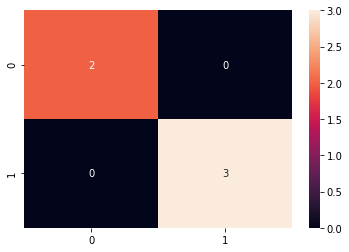

In [86]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True);

## Step #5: Testing Results Visualization

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


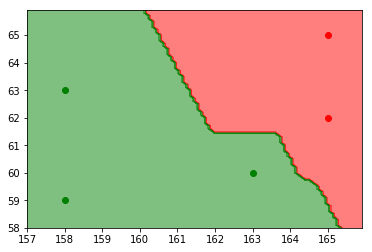

In [96]:
from matplotlib.colors import ListedColormap
X_grid, y_grid = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_grid[:, 0].min() - 1, stop = X_grid[:, 0].max() + 1, step = 0.1),
                     np.arange(start = X_grid[:, 1].min() - 1, stop = X_grid[:, 1].max() + 1, step = 0.1))
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                alpha=0.5, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_grid)):
    plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)